<a href="https://colab.research.google.com/github/felixlys/ModelMatematika_PMPvsGEKKO/blob/main/ModelMathRadikal_Fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
x_iterasi = np.zeros((4,5000))
T = 5000
dt = 1  # Delta t
maxk = int(T / dt)
#Param
b=1.7*10**-11
Gam=7776
mu=0.000018
qE=0.75
qR=0.25
CE=0.0006
CR=0.0008
pE=0.00274
pR=0.00274
vS=0.000342
vT=0.9997
dE=0.00083
dR=0.00083
dT=0.00083
d=0.0016
k=6.6
bE=pE+CE+mu+dE
bR=pR+CR+mu+dR
bT=((1-k)*(vS+vT)+k)*d+mu
import gekko
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO
m=GEKKO(remote=False)
nt=5000
m.time=np.linspace(0,5000,nt)
N=276361783

S=m.Var(value=276343752)
E=m.Var(value=12750)
R=m.Var(value=4250)
T=m.Var(value=1031)


m.Equation(S.dt()==Gam+(1-k)*d*(T)*vS-((qE+qR)*b*(R)+mu)*(S))
m.Equation(E.dt()==(qE*b*(S)+CR)*(R)+(1-k)*d*(T)*vT-bE*(E))
m.Equation(R.dt()==qR*b*(S)*(R)+CE*(E)-bR*(R))
m.Equation(T.dt()==pE*(E)+pR*(R)-bT*(T))

m.options.IMODE=4
m.solve()


 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:          39992
 Number of total equations: -        39992
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.82992E-17  4.38596E-02
    1  9.74289E-23  5.80464E-05
    2  9.7428

In [ ]:
pip install gekko

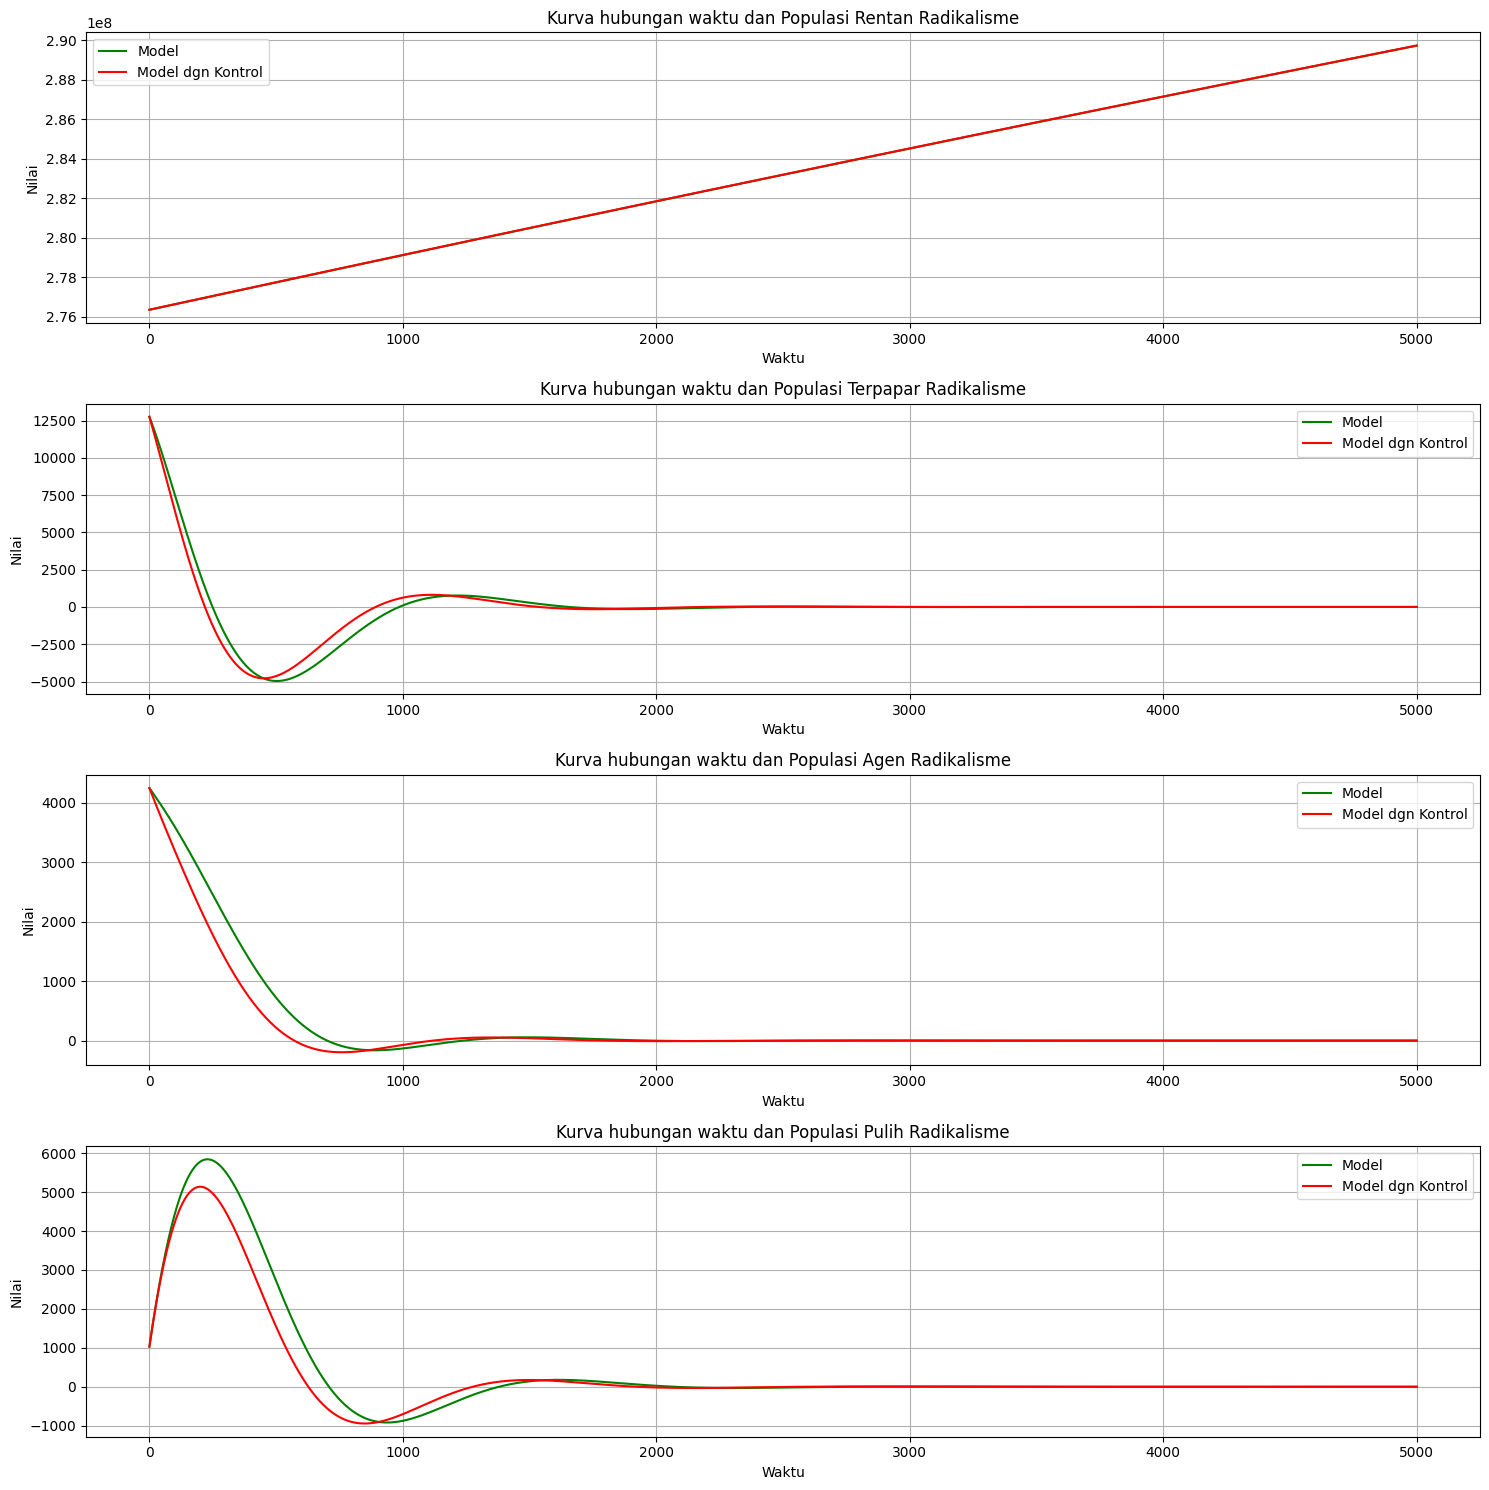

In [ ]:
# Mengubah ukuran subplot menjadi 3x1
fig, axes = plt.subplots(4, 1, figsize=(15,15))
time = np.linspace(0, T, maxk)
# Plot Rentan Jumlah Masyarakat Rentan Radikalisme thd waktu
axes[0].plot(m.time,S.value, label=f'Model', color='green')
axes[0].plot(m.time,S1.value, label=f'Model dgn Kontrol', color='red')
axes[0].set_title('Kurva hubungan waktu dan Populasi Rentan Radikalisme')
axes[0].set_xlabel('Waktu')
axes[0].set_ylabel('Nilai')
axes[0].grid(True)
axes[0].legend()
# Plot Rentan Jumlah Masyarakat Terpapar Radikalisme thd waktu
axes[1].plot(m.time, E.value, label=f'Model', color='green')
axes[1].plot(m.time, E1.value, label=f'Model dgn Kontrol', color='red')
axes[1].set_title('Kurva hubungan waktu dan Populasi Terpapar Radikalisme')
axes[1].set_xlabel('Waktu')
axes[1].set_ylabel('Nilai')
axes[1].grid(True)
axes[1].legend()

# Plot Rentan Jumlah Masyrakat Agen Radikalisme thd waktu
axes[2].plot(m.time, R.value, label=f'Model', color='green')
axes[2].plot(m.time, R1.value, label=f'Model dgn Kontrol', color='red')
axes[2].set_title('Kurva hubungan waktu dan Populasi Agen Radikalisme')
axes[2].set_xlabel('Waktu')
axes[2].set_ylabel('Nilai')
axes[2].grid(True)
axes[2].legend()

# Plot Rentan Jumlah Masyarakat Pulih Radikalisme thd waktu
axes[3].plot(m.time, T.value, label=f'Model', color='green')
axes[3].plot(m.time, T1.value, label=f'Model dgn Kontrol', color='red')
axes[3].set_title('Kurva hubungan waktu dan Populasi Pulih Radikalisme')
axes[3].set_xlabel('Waktu')
axes[3].set_ylabel('Nilai')
axes[3].grid(True)
axes[3].legend()
plt.tight_layout()
plt.show()

In [ ]:
pip install GEKKO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 38.0 MB/s eta 0:00:00


In [ ]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
m=GEKKO()
nt=5000
m.time=np.linspace(0,5000,5000)
#Variabel
S1 = m.Var(value=276343752)
E1 = m.Var(value=12750)
R1 = m.Var(value=4250)
T1 = m.Var(value=1031)
u1=m.Var(value=0,lb=0,ub=1)
u2=m.Var(value=0,lb=0,ub=1)

p=np.zeros(nt)
p[-1]=1.0
final=m.Param(value=p)
#Model Sisdim
m.Equation(S1.dt()==Gam+(1-k)*d*(T1)*vS-((u1+u2)*(qE+qR)*b*(R1)+mu)*(S1))
m.Equation(E1.dt() == (qE * b * S1*u1 + CR) * R1 + (1 - k) * d * T1 * vT-bE*E1)
m.Equation(R1.dt() == qR * b * S1*u2* R1 + CE * E1 - bR * R1)
m.Equation(T1.dt() == pE * E1 + pR * R1-bT*T1)
obj = 100*E1 * final + 100*R1 * final + 0.5 * 100 * m.integral(u1**2) + 0.5 * 100 * m.integral(u2**2)
m.Minimize(obj)

# Objective function
m.options.IMODE = 6 # optimal control mode
m.solve()

apm 34.173.126.129_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            9
   Intermediates:            0
   Connections  :            0
   Equations    :            7
   Residuals    :            7
 
 Number of state variables:          69986
 Number of total equations: -        59988
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :           9998
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

In [ ]:

Ss=427068097.294
Ee=180.193
Rr=61756.253
Tt=28026.675
bR=pR+CR+mu+dR
bE=pE+CE+mu+dE
bT=((1-k)*(vS+vT)+k)*d+mu
j_11=-((qE+qR)*b*Rr+mu)*Ss
j_12=0
j_13=-(qE+qR)*b*Ss
j_14=(1-k)*d*vS

j_21=qE*b*Rr
j_22=-1*bE
j_23=qE*b*Ss+CR
j_24=(1-k)*d*vT

j_31=qR*b*Rr
j_32=CE
j_33=qR*b*Ss-bR
j_34=0

j_41=0
j_42=pE
j_43=pR
j_44=-1*bT
J=np.array([[j_11, j_12, j_13, j_14],
            [j_21, j_22, j_23, j_24],
            [j_31, j_32, j_33, j_34],
            [j_41, j_42, j_43, j_44]])
print(J)

[[-8.13558588e+03  0.00000000e+00 -7.26015765e-03 -3.06432000e-06]
 [ 7.87392226e-07 -4.18800000e-03  6.24511824e-03 -8.95731200e-03]
 [ 2.62464075e-07  6.00000000e-04 -2.57296059e-03  0.00000000e+00]
 [ 0.00000000e+00  2.74000000e-03  2.74000000e-03 -1.61762368e-03]]


In [ ]:
print(lam)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#PMP Dengan Python By Felix Lyanto Setiawan MATEMATIKA ITS
import numpy as np

def kontrol(Gam, t0, tf, u1max, u2max, n, c1, c2, c3, c4):
    b = 1.7e-11
    Gam = 7776
    mu = 0.000018
    qE = 0.75
    qR = 0.25
    CE = 0.0006
    CR = 0.0008
    pE = 0.00274
    pR = 0.00274
    vS = 0.000342
    vT = 0.9997
    dE = 0.00083
    dR = 0.00083
    dT = 0.00083
    d = 0.0016
    k = 6.6
    bE = pE + CE + mu + dE
    bR = pR + CR + mu + dR
    bT = ((1 - k) * (vS + vT) + k) * d + mu
    h = (tf - t0) / n
    tol = 1e-6

    S0 = 276343752
    E0 = 12750
    R0 = 4250
    T0 = 1031

    S = np.zeros(n + 1)
    E = np.zeros(n + 1)
    T = np.zeros(n + 1)
    R = np.zeros(n + 1)
    l1 = np.zeros(n + 1)
    l2 = np.zeros(n + 1)
    l3 = np.zeros(n + 1)
    l4 = np.zeros(n + 1)

    u1 = np.full(n + 1, 0.5)
    u2 = np.full(n + 1, 0.5)

    S[0] = S0
    E[0] = E0
    R[0] = R0
    T[0] = T0

    l1[-1] = 0
    l2[-1] = c1
    l3[-1] = c2
    l4[-1] = 0

    error1 = tol + 1
    error2 = tol + 1

    while error1 > tol and error2 > tol:
        oldu1 = u1.copy()
        oldu2 = u2.copy()

        for i in range(n):
            k11 = Gam + (1 - k) * d * T[i] * vS - ((u1[i] + u2[i]) * (qE + qR) * b * R[i] + mu) * S[i]
            k12 = (u1[i] * qE * b * S[i] + CR) * R[i] + (1 - k) * d * T[i] * vT - bE * E[i]
            k13 = u2[i] * qR * b * S[i] * R[i] + CE * E[i] - bR * R[i]
            k14 = pE * E[i] + pR * R[i] - bT * T[i]

            k21 = Gam + (1 - k) * d * (T[i] + k14 * h / 2) * vS - ((u1[i] + u2[i]) * (qE + qR) * b * (R[i] + k13 * h / 2) + mu) * (S[i] + k11 * h / 2)
            k22 = (u1[i] * qE * b * (S[i] + k11 * h / 2) + CR) * (R[i] + k13 * h / 2) + (1 - k) * d * (T[i] + k14 * h / 2) * vT - bE * (E[i] + k12 * h / 2)
            k23 = u2[i] * qR * b * (S[i] + k11 * h / 2) * (R[i] + k13 * h / 2) + CE * (E[i] + k12 * h / 2) - bR * (R[i] + k13 * h / 2)
            k24 = pE * (E[i] + k12 * h / 2) + pR * (R[i] + k13 * h / 2) - bT * (T[i] + k14 * h / 2)

            k31 = Gam + (1 - k) * d * (T[i] + k24 * h / 2) * vS - ((u1[i] + u2[i]) * (qE + qR) * b * (R[i] + k23 * h / 2) + mu) * (S[i] + k21 * h / 2)
            k32 = (u1[i] * qE * b * (S[i] + k21 * h / 2) + CR) * (R[i] + k23 * h / 2) + (1 - k) * d * (T[i] + k24 * h / 2) * vT - bE * (E[i] + k22 * h / 2)
            k33 = u2[i] * qR * b * (S[i] + k21 * h / 2) * (R[i] + k23 * h / 2) + CE * (E[i] + k22 * h / 2) - bR * (R[i] + k23 * h / 2)
            k34 = pE * (E[i] + k22 * h / 2) + pR * (R[i] + k23 * h / 2) - bT * (T[i] + k24 * h / 2)

            k41 = Gam + (1 - k) * d * (T[i] + k34 * h) * vS - ((u1[i] + u2[i]) * (qE + qR) * b * (R[i] + k33 * h) + mu) * (S[i] + k31 * h)
            k42 = (u1[i] * qE * b * (S[i] + k31 * h) + CR) * (R[i] + k33 * h) + (1 - k) * d * (T[i] + k34 * h) * vT - bE * (E[i] + k32 * h)
            k43 = u2[i] * qR * b * (S[i] + k31 * h) * (R[i] + k33 * h) + CE * (E[i] + k32 * h) - bR * (R[i] + k33 * h)
            k44 = pE * (E[i] + k32 * h) + pR * (R[i] + k33 * h) - bT * (T[i] + k34 * h)

            k1 = (k11 + 2 * k21 + 2 * k31 + k41) / 6
            k2 = (k12 + 2 * k22 + 2 * k32 + k42) / 6
            k3 = (k13 + 2 * k23 + 2 * k33 + k43) / 6
            k4 = (k14 + 2 * k24 + 2 * k34 + k44) / 6

            S[i + 1] = S[i] + h * k1
            E[i + 1] = E[i] + h * k2
            R[i + 1] = R[i] + h * k3
            T[i + 1] = T[i] + h * k4

        for i in range(1, n):
            j = (n + 1) - i
            p11 = -(-l1[j] * ((u1[j] + u2[j]) * (qE + qR) * b * R[j] + mu) + l2[j] * u1[j] * qE * b * R[j] + l3[j] * u2[j] * qR * b * R[j])
            p12 = l2[j] * bE - l3[j] * CE - l4[j] * pE
            p13 = -(-l1[j] * ((u1[j] + u2[j]) * (qE + qR) * b * S[j]) + l2[j] * (CR + u1[j] * qE * b * S[j]) + l3[j] * (u2[j] * qR * b * S[j] - bR) + l4[j] * pR)
            p14 = -((1 - k) * l1[j] * d * vS + (1 - k) * l2[j] * d * vT - l4[j] * bT)

            p21 = -(-(l1[j] + p11 * h / 2) * ((u1[j] + u2[j]) * (qE + qR) * b * R[j] + mu) + (l2[j] + p12 * h / 2) * u1[j] * qE * b * R[j] + (l3[j] + p13 * h / 2) * u2[j] * qR * b * R[j])
            p22 = (l2[j] + p12 * h / 2) * bE - (l3[j] + p13 * h / 2) * CE - (l4[j] + p14 * h / 2) * pE
            p23 = -(-(l1[j] + p11 * h / 2) * ((u1[j] + u2[j]) * (qE + qR) * b * S[j]) + (l2[j] + p12 * h / 2) * (CR + u1[j] * qE * b * S[j]) + (l3[j] + p13 * h / 2) * (u2[j] * qR * b * S[j] - bR) + (l4[j] + p14 * h / 2) * pR)
            p24 = -((1 - k) * (l1[j] + p11 * h / 2) * d * vS + (1 - k) * (l2[j] + p12 * h / 2) * d * vT - (l4[j] + p14 * h / 2) * bT)

            p31 = -(-(l1[j] + p21 * h / 2) * ((u1[j] + u2[j]) * (qE + qR) * b * R[j] + mu) + (l2[j] + p22 * h / 2) * u1[j] * qE * b * R[j] + (l3[j] + p23 * h / 2) * u2[j] * qR * b * R[j])
            p32 = (l2[j] + p22 * h / 2) * bE - (l3[j] + p23 * h / 2) * CE - (l4[j] + p24 * h / 2) * pE
            p33 = -(-(l1[j] + p21 * h / 2) * ((u1[j] + u2[j]) * (qE + qR) * b * S[j]) + (l2[j] + p22 * h / 2) * (CR + u1[j] * qE * b * S[j]) + (l3[j] + p23 * h / 2) * (u2[j] * qR * b * S[j] - bR) + (l4[j] + p24 * h / 2) * pR)
            p34 = -((1 - k) * (l1[j] + p21 * h / 2) * d * vS + (1 - k) * (l2[j] + p22 * h / 2) * d * vT - (l4[j] + p24 * h / 2) * bT)

            p41 = -(-(l1[j] + p31 * h) * ((u1[j] + u2[j]) * (qE + qR) * b * R[j] + mu) + (l2[j] + p32 * h) * u1[j] * qE * b * R[j] + (l3[j] + p33 * h) * u2[j] * qR * b * R[j])
            p42 = (l2[j] + p32 * h) * bE - (l3[j] + p33 * h) * CE - (l4[j] + p34 * h) * pE
            p43 = -(-(l1[j] + p31 * h) * ((u1[j] + u2[j]) * (qE + qR) * b * S[j]) + (l2[j] + p32 * h) * (CR + u1[j] * qE * b * S[j]) + (l3[j] + p33 * h) * (u2[j] * qR * b * S[j] - bR) + (l4[j] + p34 * h) * pR)
            p44 = -((1 - k) * (l1[j] + p31 * h) * d * vS + (1 - k) * (l2[j] + p32 * h) * d * vT - (l4[j] + p34 * h) * bT)

            p1 = (p11 + 2 * p21 + 2 * p31 + p41) / 6
            p2 = (p12 + 2 * p22 + 2 * p32 + p42) / 6
            p3 = (p13 + 2 * p23 + 2 * p33 + p43) / 6
            p4 = (p14 + 2 * p24 + 2 * p34 + p44) / 6

            l1[j - 1] = l1[j] - h * p1
            l2[j - 1] = l2[j] - h * p2
            l3[j - 1] = l3[j] - h * p3
            l4[j - 1] = l4[j] - h * p4

        temp1 = (l1 * ((qE + qR) * b * S * R) - l2 * (qE * b * S * R)) / c3
        uu1 = np.clip(temp1, 0, u1max)
        temp2 = (l1 * ((qE + qR) * b * S * R) - l3 * (qR * b * S * R)) / c4
        uu2 = np.clip(temp2, 0, u2max)

        u1 = 0.5 * (uu1 + oldu1)
        u2 = 0.5 * (uu2 + oldu2)

        error1 = np.sum(np.abs(oldu1 - u1))
        error2 = np.sum(np.abs(oldu2 - u2))

    f = (c3 * u1**2) / 2 + (c4 * u2**2) / 2
    J = E[-1] + R[-1] + np.sum(f * h)
    return np.array(S),np.array(E),np.array(R),np.array(T)


In [ ]:
S_ctrl, E_ctrl, R_ctrl, T_ctrl =kontrol(7776,0,5000,1,1,5000,100,100,100,100)




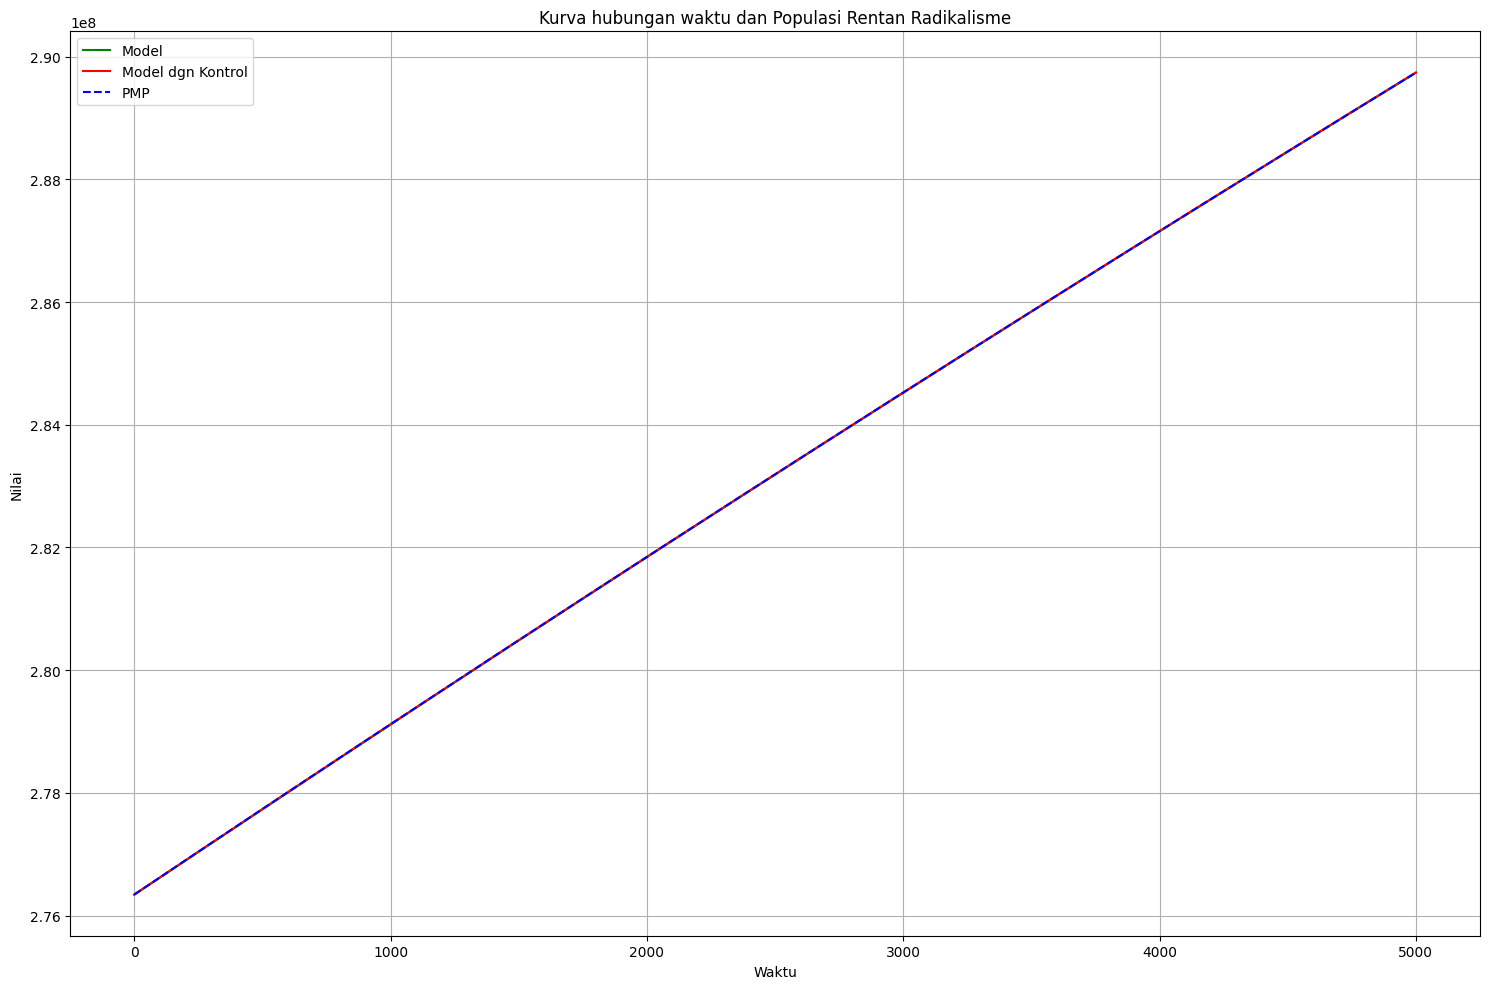

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(m.time,S.value, label=f'Model', color='green')
plt.plot(m.time,S1.value, label=f'Model dgn Kontrol', color='red')
plt.plot(m.time,S_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
plt.title('Kurva hubungan waktu dan Populasi Rentan Radikalisme')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

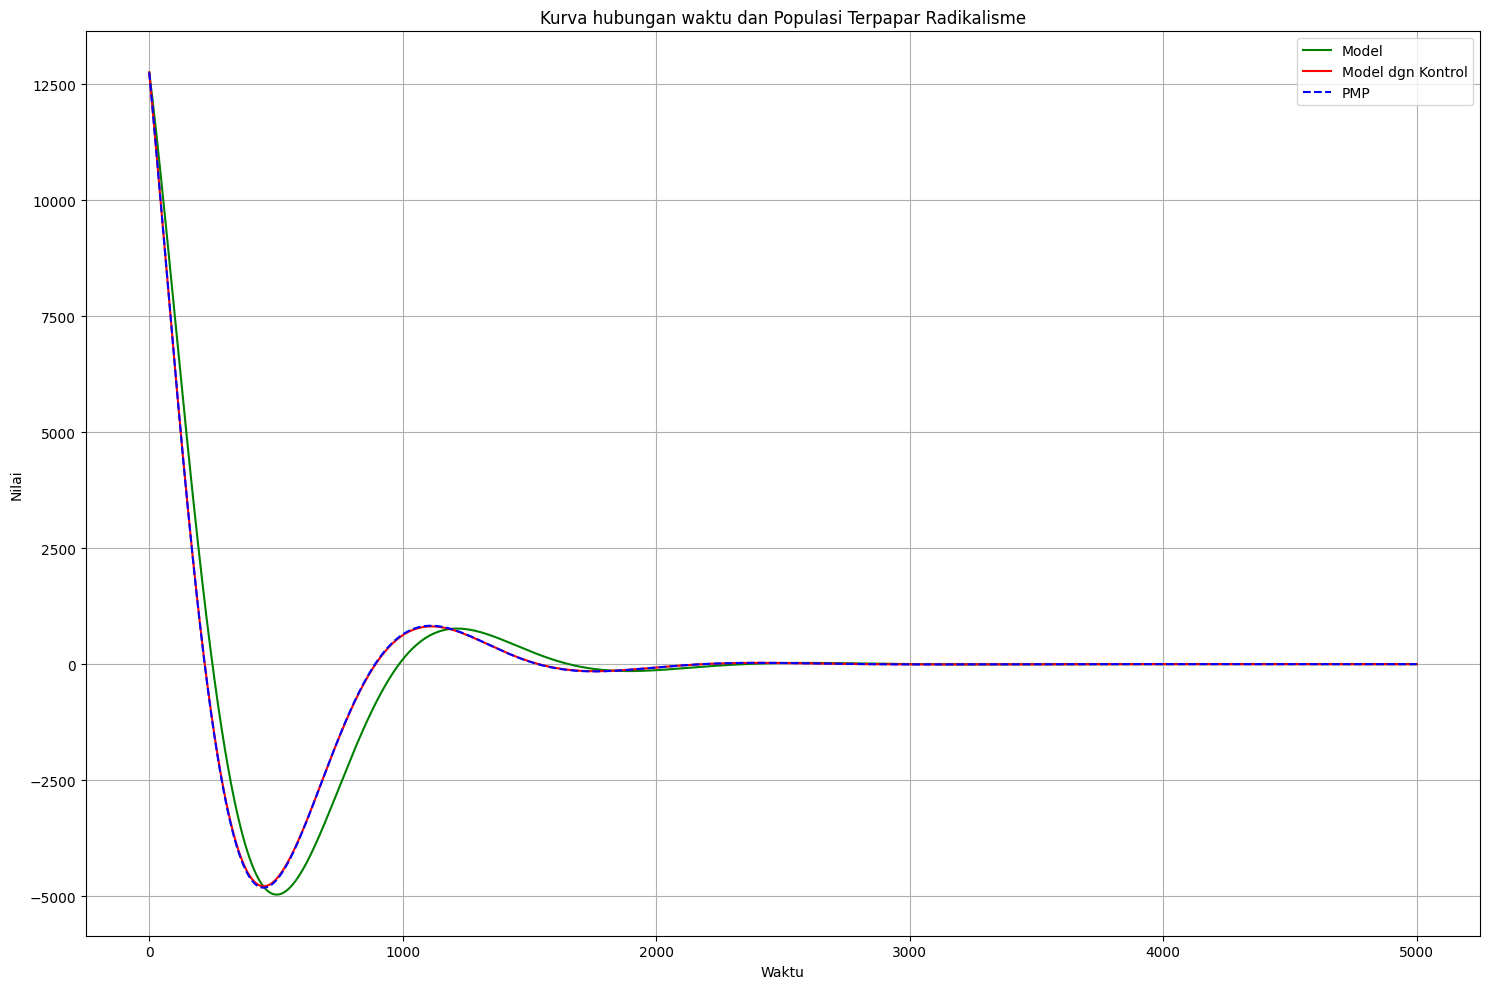

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(m.time,E.value, label=f'Model', color='green')
plt.plot(m.time,E1.value, label=f'Model dgn Kontrol', color='red')
plt.plot(m.time,E_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
plt.title('Kurva hubungan waktu dan Populasi Terpapar Radikalisme')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

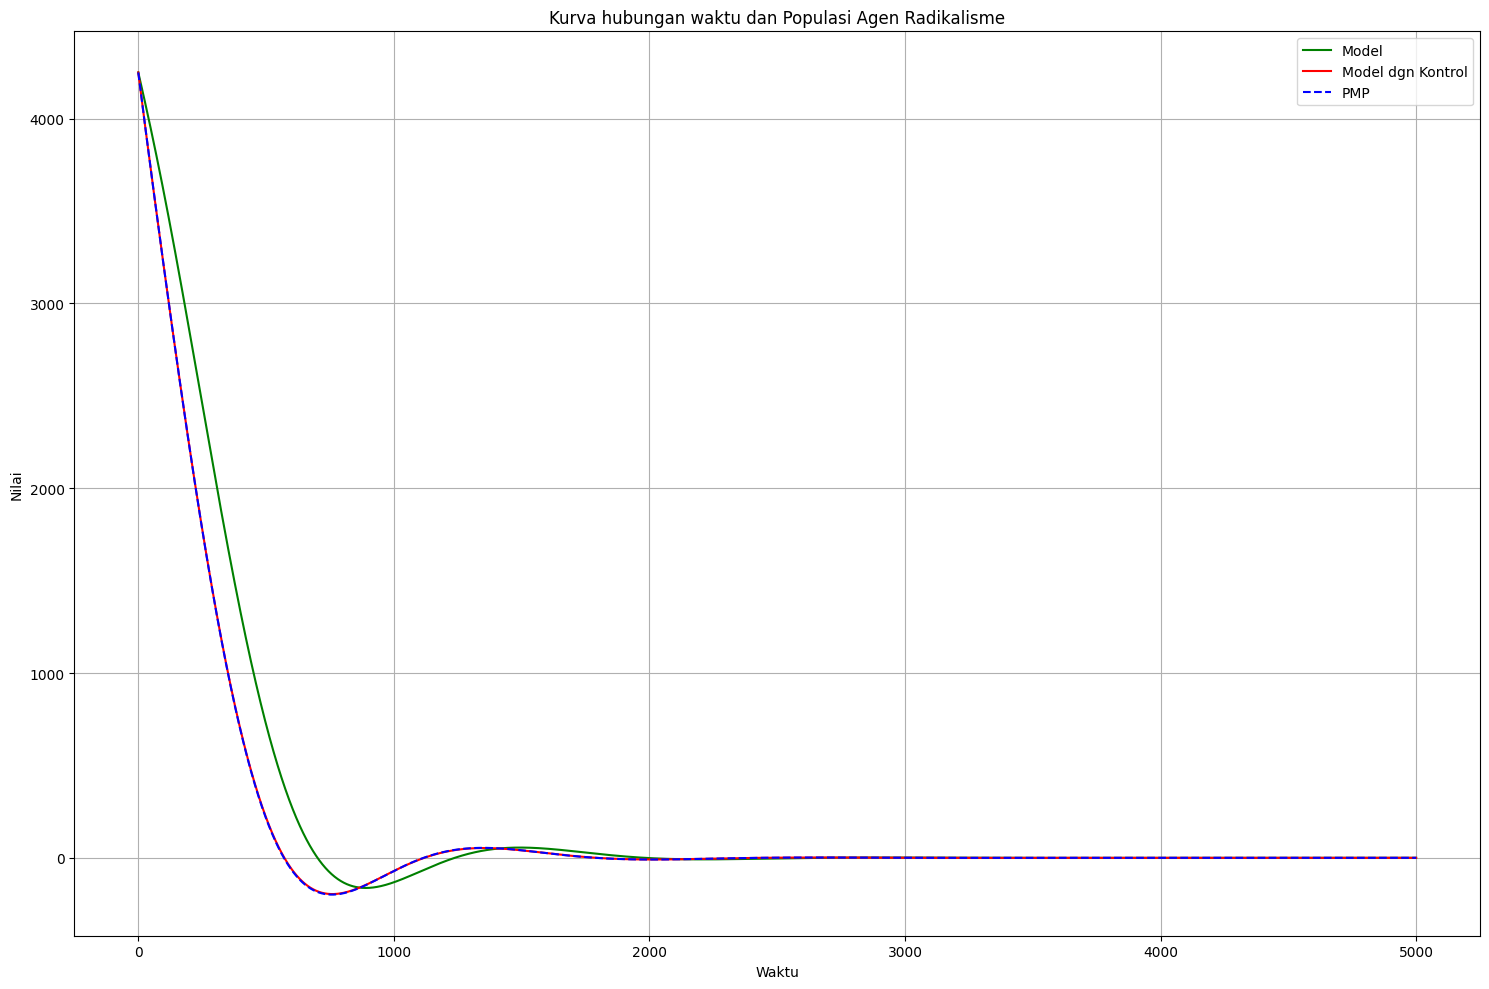

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(m.time,R.value, label=f'Model', color='green')
plt.plot(m.time,R1.value, label=f'Model dgn Kontrol', color='red')
plt.plot(m.time,R_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
plt.title('Kurva hubungan waktu dan Populasi Agen Radikalisme')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

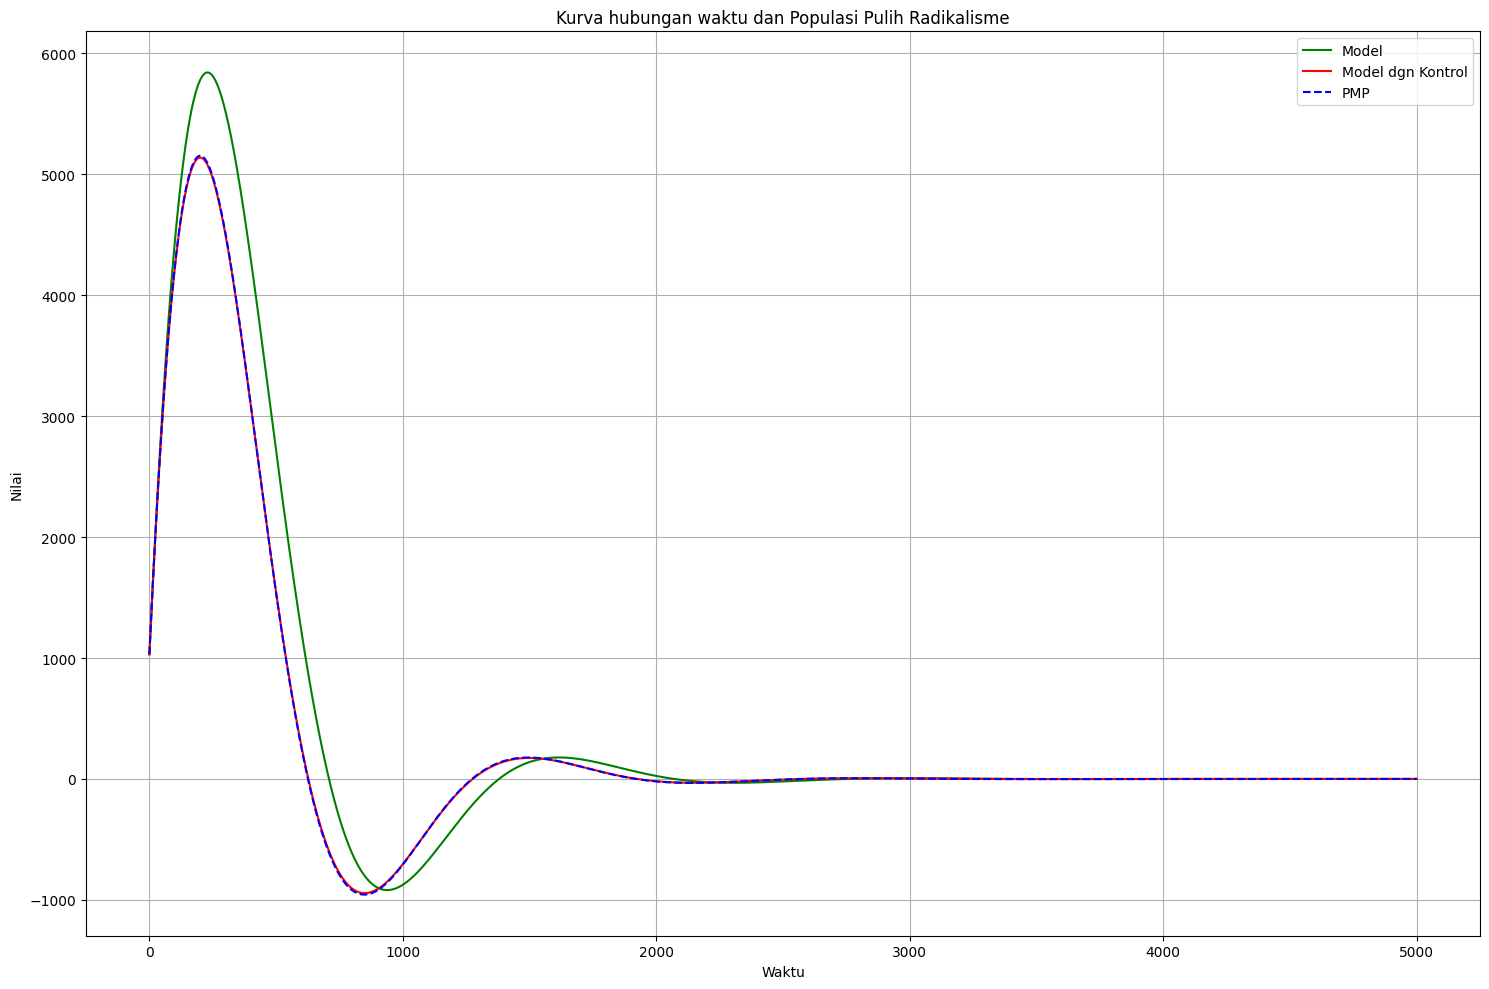

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(m.time,T.value, label=f'Model', color='green')
plt.plot(m.time,T1.value, label=f'Model dgn Kontrol', color='red')
plt.plot(m.time,T_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
plt.title('Kurva hubungan waktu dan Populasi Pulih Radikalisme')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

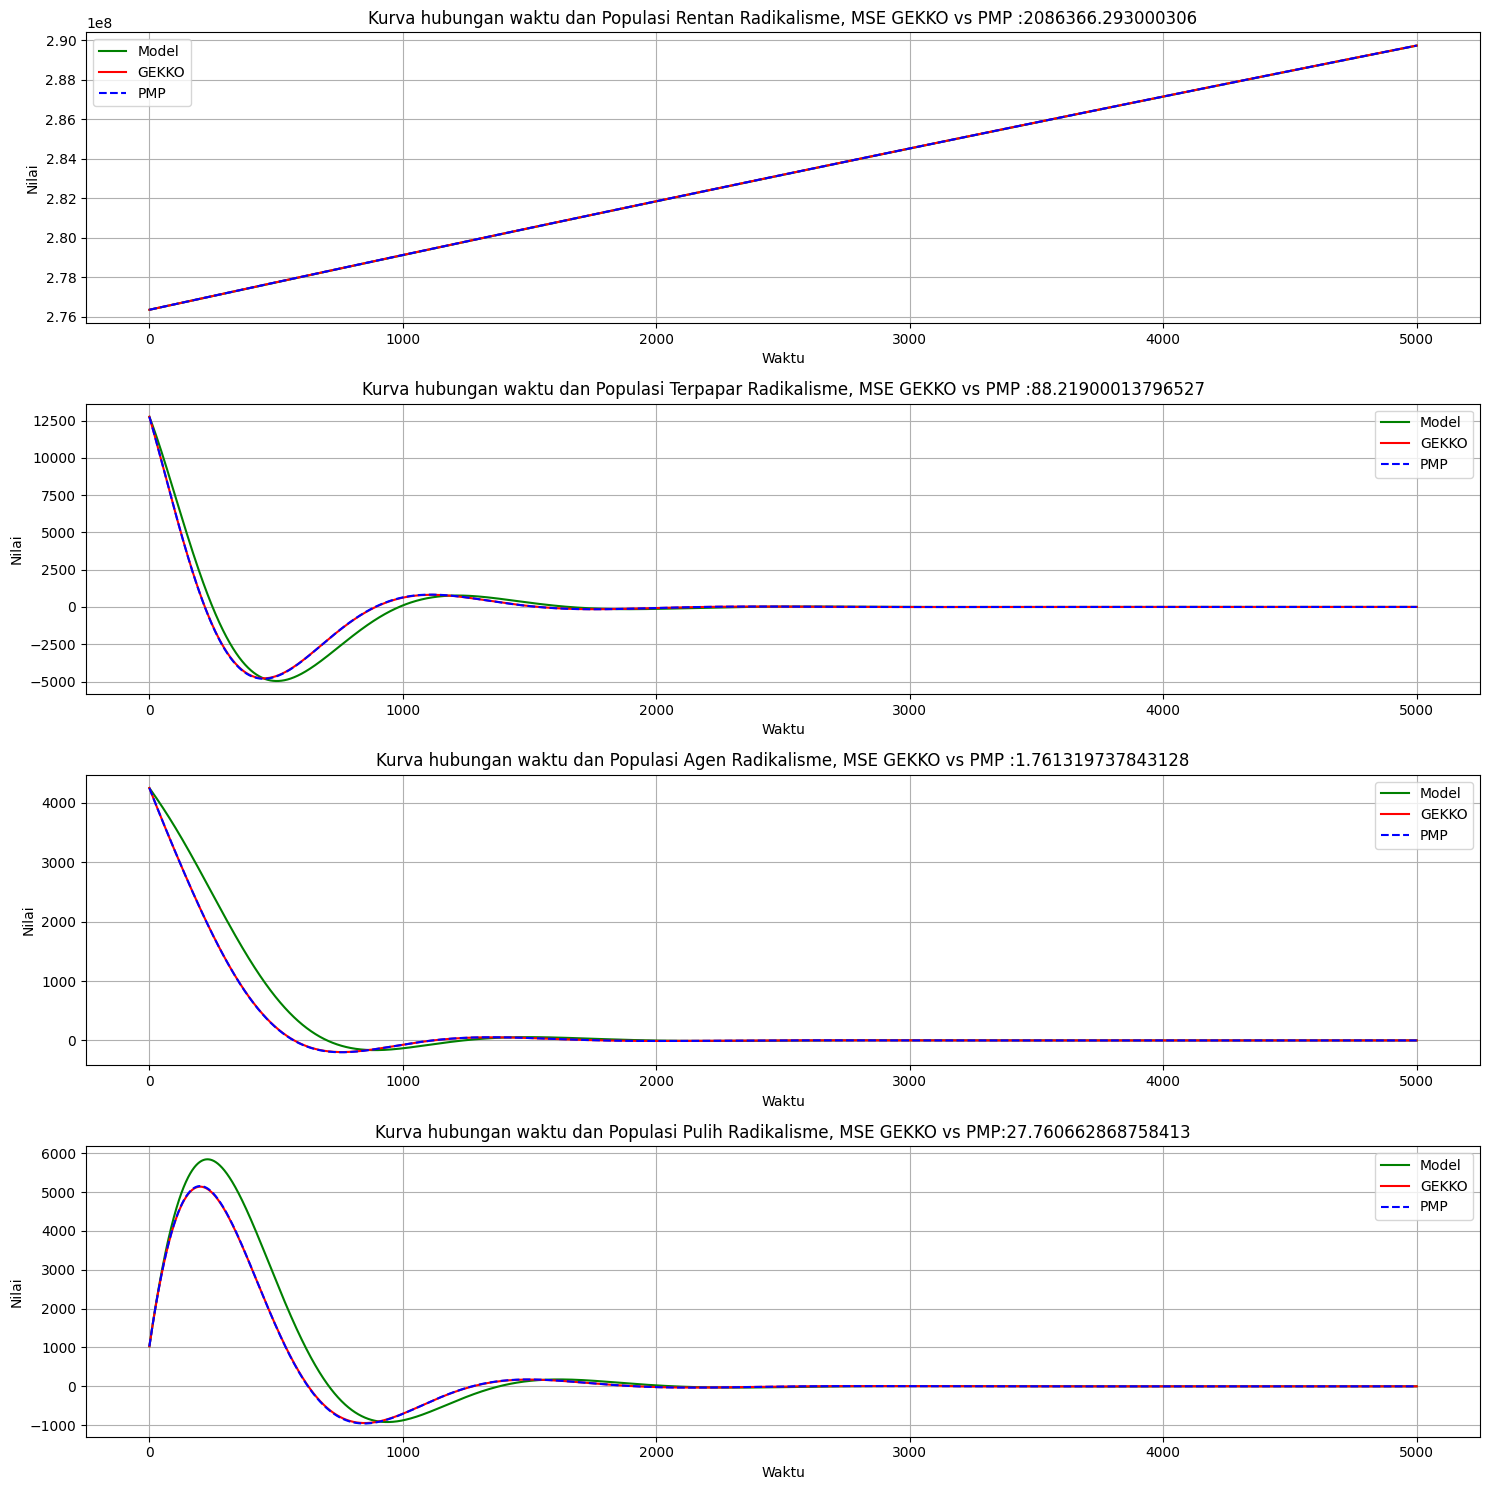

In [ ]:
#Plot Lengkap
from sklearn.metrics import mean_squared_error
# Mengubah ukuran subplot menjadi 3x1
fig, axes = plt.subplots(4, 1, figsize=(15,15))
time = np.linspace(0, T, maxk)
mse1 = mean_squared_error(S1, S_ctrl[:-1])
mse2 = mean_squared_error(E1, E_ctrl[:-1])
mse3=mean_squared_error(R1, R_ctrl[:-1])
mse4 = mean_squared_error(T1, T_ctrl[:-1])

# Menghitung MSE tanpa elemen terakhir dari S
# Plot Rentan Jumlah Masyarakat Rentan Radikalisme thd waktu
axes[0].plot(m.time,S.value, label=f'Model', color='green')
axes[0].plot(m.time,S1.value, label=f'GEKKO', color='red')
axes[0].plot(m.time,S_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
axes[0].set_title(f'Kurva hubungan waktu dan Populasi Rentan Radikalisme, MSE GEKKO vs PMP :{mse1}')
axes[0].set_xlabel('Waktu')
axes[0].set_ylabel('Nilai')
axes[0].grid(True)
axes[0].legend()
# Plot Rentan Jumlah Masyarakat Terpapar Radikalisme thd waktu
axes[1].plot(m.time, E.value, label=f'Model', color='green')
axes[1].plot(m.time, E1.value, label=f'GEKKO', color='red')
axes[1].plot(m.time,E_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
axes[1].set_title(f'Kurva hubungan waktu dan Populasi Terpapar Radikalisme, MSE GEKKO vs PMP :{mse2}')
axes[1].set_xlabel('Waktu')
axes[1].set_ylabel('Nilai')
axes[1].grid(True)
axes[1].legend()

# Plot Rentan Jumlah Masyrakat Agen Radikalisme thd waktu
axes[2].plot(m.time, R.value, label=f'Model', color='green')
axes[2].plot(m.time, R1.value, label=f'GEKKO', color='red')
axes[2].plot(m.time,R_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
axes[2].set_title(f'Kurva hubungan waktu dan Populasi Agen Radikalisme, MSE GEKKO vs PMP :{mse3}')
axes[2].set_xlabel('Waktu')
axes[2].set_ylabel('Nilai')
axes[2].grid(True)
axes[2].legend()

# Plot Rentan Jumlah Masyarakat Pulih Radikalisme thd waktu
axes[3].plot(m.time, T.value, label=f'Model', color='green')
axes[3].plot(m.time, T1.value, label=f'GEKKO', color='red')
axes[3].plot(m.time,T_ctrl[:-1],label=f'PMP', color='blue',linestyle='--')
axes[3].set_title(f'Kurva hubungan waktu dan Populasi Pulih Radikalisme, MSE GEKKO vs PMP:{mse4}')
axes[3].set_xlabel('Waktu')
axes[3].set_ylabel('Nilai')
axes[3].grid(True)
axes[3].legend()
plt.tight_layout()
plt.show()




In [ ]:
S_ctrl1, E_ctrl1, R_ctrl1, T_ctrl1 =kontrol(7776,0,5000,1,0,5000,100,100,100,100)
S_ctrl2, E_ctrl2, R_ctrl2, T_ctrl2 =kontrol(7776,0,5000,0,1,5000,100,100,100,100)

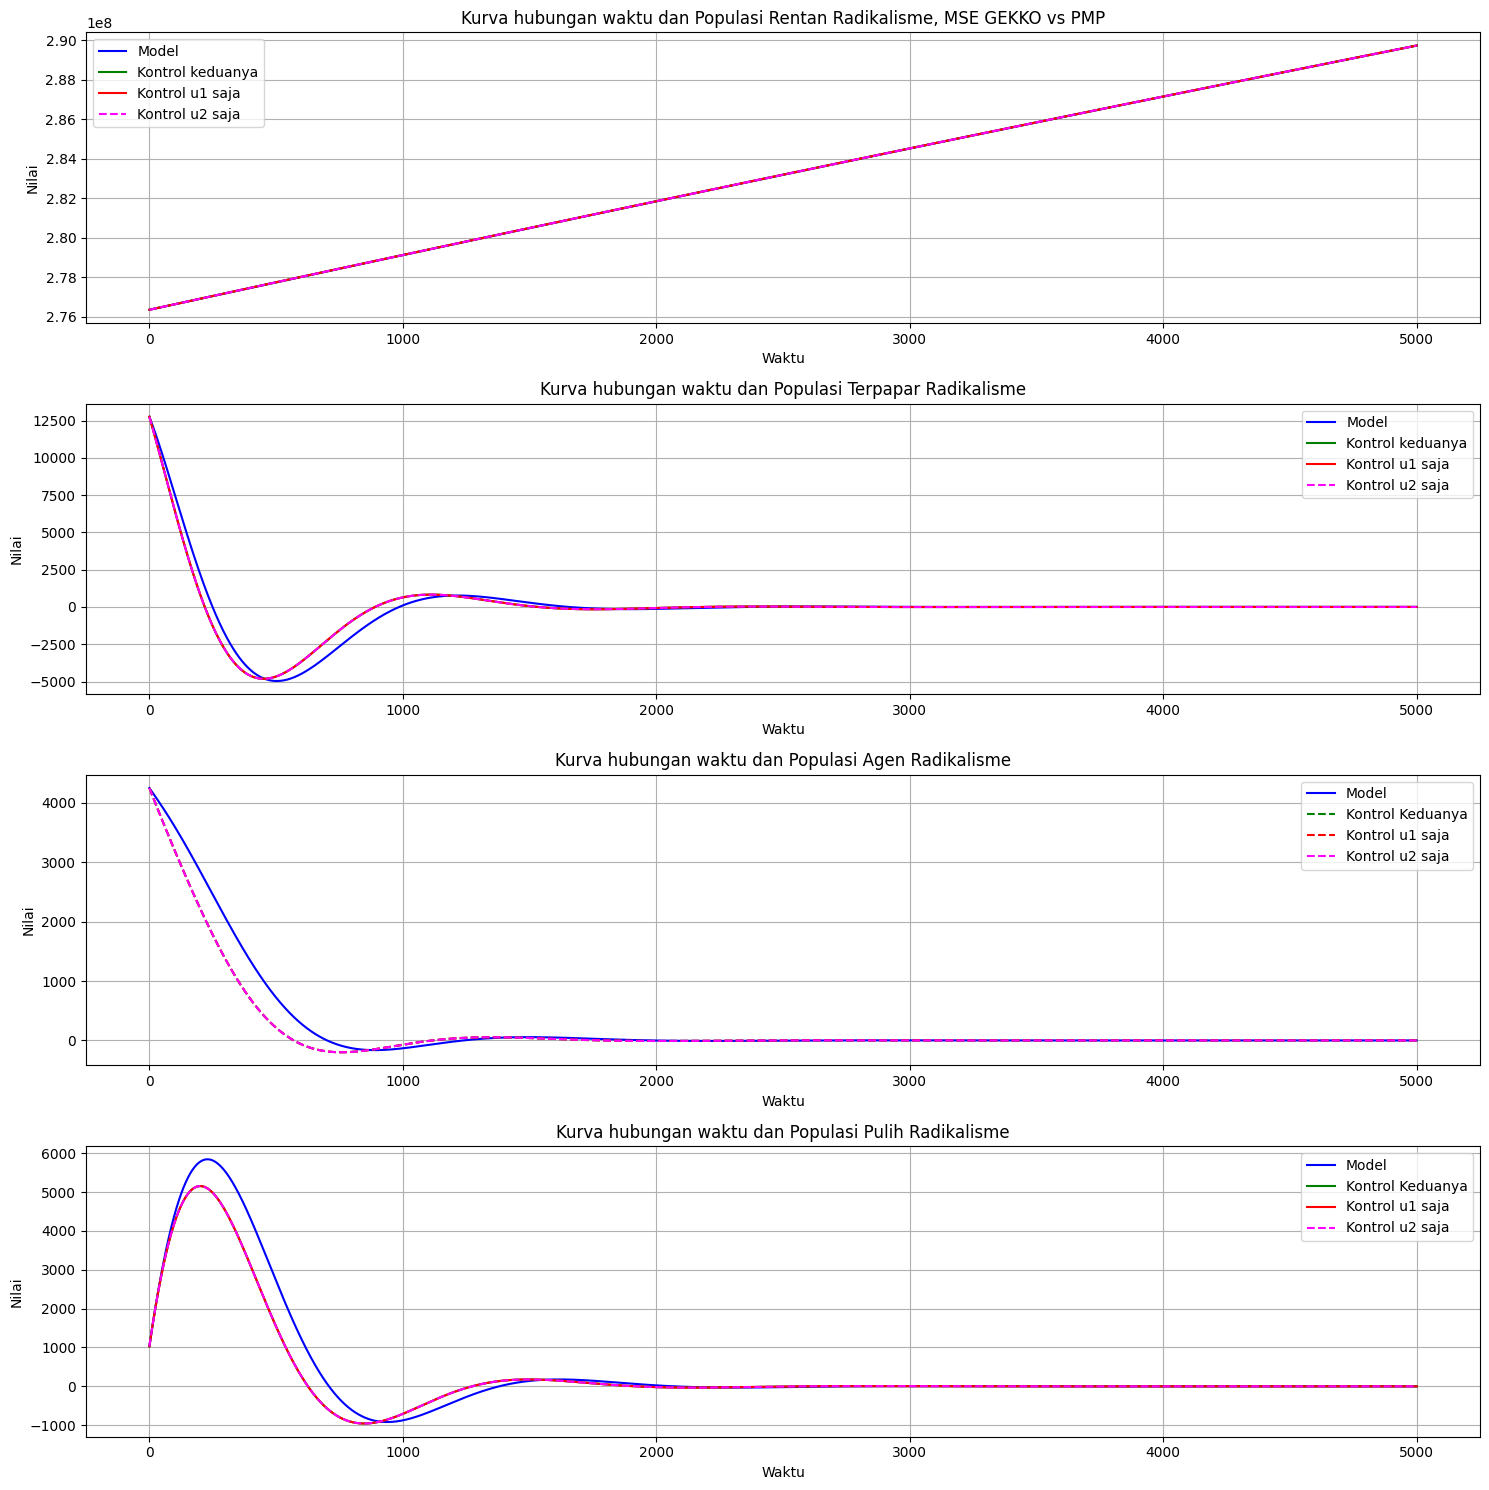

In [ ]:
#Plot Lengkap
from sklearn.metrics import mean_squared_error
# Mengubah ukuran subplot menjadi 3x1
fig, axes = plt.subplots(4, 1, figsize=(15,15))
time = np.linspace(0, T, maxk)


# Menghitung MSE tanpa elemen terakhir dari S
# Plot Rentan Jumlah Masyarakat Rentan Radikalisme thd waktu
axes[0].plot(m.time,S, label=f'Model', color='blue')
axes[0].plot(m.time,S_ctrl[:-1], label=f'Kontrol keduanya', color='green')
axes[0].plot(m.time,S_ctrl1[:-1], label=f'Kontrol u1 saja', color='red')
axes[0].plot(m.time,S_ctrl2[:-1],label=f'Kontrol u2 saja', color='magenta',linestyle='--')
axes[0].set_title(f'Kurva hubungan waktu dan Populasi Rentan Radikalisme, MSE GEKKO vs PMP')
axes[0].set_xlabel('Waktu')
axes[0].set_ylabel('Nilai')
axes[0].grid(True)
axes[0].legend()
# Plot Rentan Jumlah Masyarakat Terpapar Radikalisme thd waktu
axes[1].plot(m.time,E, label=f'Model', color='blue')
axes[1].plot(m.time,E_ctrl[:-1], label=f'Kontrol keduanya', color='green')
axes[1].plot(m.time,E_ctrl1[:-1], label=f'Kontrol u1 saja', color='red')
axes[1].plot(m.time,E_ctrl2[:-1],label=f'Kontrol u2 saja', color='magenta',linestyle='--')
axes[1].set_title(f'Kurva hubungan waktu dan Populasi Terpapar Radikalisme')
axes[1].set_xlabel('Waktu')
axes[1].set_ylabel('Nilai')
axes[1].grid(True)
axes[1].legend()

# Plot Rentan Jumlah Masyrakat Agen Radikalisme thd waktu
axes[2].plot(m.time,R,label=f'Model', color='blue')
axes[2].plot(m.time, R_ctrl[:-1], label=f'Kontrol Keduanya', color='green',linestyle='--')
axes[2].plot(m.time, R_ctrl1[:-1], label=f'Kontrol u1 saja', color='red',linestyle='--')
axes[2].plot(m.time,R_ctrl2[:-1],label=f'Kontrol u2 saja', color='magenta',linestyle='--')
axes[2].set_title(f'Kurva hubungan waktu dan Populasi Agen Radikalisme')
axes[2].set_xlabel('Waktu')
axes[2].set_ylabel('Nilai')
axes[2].grid(True)
axes[2].legend()

# Plot Rentan Jumlah Masyarakat Pulih Radikalisme thd waktu
axes[3].plot(m.time,T, label=f'Model', color='blue')
axes[3].plot(m.time, T_ctrl[:-1], label=f'Kontrol Keduanya', color='green')
axes[3].plot(m.time, T_ctrl1[:-1], label=f'Kontrol u1 saja', color='red')
axes[3].plot(m.time,T_ctrl2[:-1],label=f'Kontrol u2 saja', color='magenta',linestyle='--')
axes[3].set_title(f'Kurva hubungan waktu dan Populasi Pulih Radikalisme')
axes[3].set_xlabel('Waktu')
axes[3].set_ylabel('Nilai')
axes[3].grid(True)
axes[3].legend()
plt.tight_layout()
plt.show()


